In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [41]:
from warnings import filterwarnings
filterwarnings("ignore")

In [42]:
path = r"C:\Users\ASUS\Downloads\Data & Code ML\Data & Code ML\Data and Programs DTree\BreastCancer.csv"
path

'C:\\Users\\ASUS\\Downloads\\Data & Code ML\\Data & Code ML\\Data and Programs DTree\\BreastCancer.csv'

In [43]:
df = pd.read_csv(path)

In [44]:
df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [45]:
df.head(10)

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
5,142932,7,6,10,5,3,10,9,10,2,Malignant
6,144888,8,10,10,8,5,10,7,8,1,Malignant
7,145447,8,4,4,1,2,9,3,3,1,Malignant
8,160296,5,8,8,10,5,10,8,10,3,Malignant
9,167528,4,1,1,1,2,1,3,6,1,Benign


In [46]:
 dum_df = pd.get_dummies(df,drop_first=True)
dum_df.head(10)

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,False
1,63375,9,1,2,6,4,10,7,7,2,True
2,76389,10,4,7,2,2,8,6,1,1,True
3,95719,6,10,10,10,8,10,7,10,7,True
4,128059,1,1,1,1,2,5,5,1,1,False
5,142932,7,6,10,5,3,10,9,10,2,True
6,144888,8,10,10,8,5,10,7,8,1,True
7,145447,8,4,4,1,2,9,3,3,1,True
8,160296,5,8,8,10,5,10,8,10,3,True
9,167528,4,1,1,1,2,1,3,6,1,False


In [47]:
x = dum_df.iloc[:, 1:10]
y = dum_df.iloc[:, 10]

In [48]:
x.shape, y.shape

((699, 9), (699,))

In [49]:
x

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
0,5,4,3,1,2,2,2,3,1
1,9,1,2,6,4,10,7,7,2
2,10,4,7,2,2,8,6,1,1
3,6,10,10,10,8,10,7,10,7
4,1,1,1,1,2,5,5,1,1
...,...,...,...,...,...,...,...,...,...
694,10,10,10,10,5,10,10,10,7
695,5,10,10,10,4,10,5,6,3
696,5,1,1,1,2,1,3,2,1
697,4,1,1,1,1,1,2,1,1


In [50]:
y

0      False
1       True
2       True
3       True
4      False
       ...  
694     True
695     True
696    False
697    False
698    False
Name: Class_Malignant, Length: 699, dtype: bool

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2021, stratify=y
)

In [52]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((489, 9), (210, 9), (210,), (489,))

In [53]:
clf = LogisticRegression(random_state=2021)
clf.fit(x_train, y_train)

LogisticRegression(random_state=2021)

In [54]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[135   3]
 [  5  67]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       138
        True       0.96      0.93      0.94        72

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210

0.9619047619047619


In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

In [56]:
y_pred_prob = clf.predict_proba(x_test)[:, 1]  # compute predicted probabilities
y_pred_prob

array([9.94607057e-01, 1.39274532e-02, 6.25996885e-01, 9.31661938e-01,
       9.99963739e-01, 9.94106353e-01, 9.85578759e-01, 3.72134520e-03,
       9.94798317e-01, 9.92569949e-01, 8.94063637e-04, 2.72734662e-03,
       7.00974138e-03, 8.96701700e-03, 9.99685177e-01, 6.48749798e-03,
       6.85122166e-02, 2.93155598e-03, 1.34235604e-01, 7.64320195e-01,
       9.93656877e-01, 3.16055863e-03, 1.23823961e-02, 3.47290699e-01,
       7.76989906e-03, 4.20807781e-03, 1.19555130e-02, 9.78815528e-01,
       8.83976005e-03, 3.63832330e-03, 1.56145018e-02, 3.29072508e-03,
       4.32783589e-03, 6.43307503e-01, 8.83976005e-03, 1.80388044e-01,
       3.10625684e-02, 1.56193440e-03, 2.45478009e-03, 8.94063637e-04,
       9.99818149e-01, 1.67903074e-03, 2.91906339e-03, 9.99996994e-01,
       3.63173481e-02, 8.49196856e-03, 1.23304373e-02, 8.16848852e-01,
       5.09467714e-03, 2.67924039e-03, 4.01507941e-02, 1.20790995e-02,
       7.40930259e-01, 9.99827152e-01, 1.07740145e-02, 9.99630129e-01,
      

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

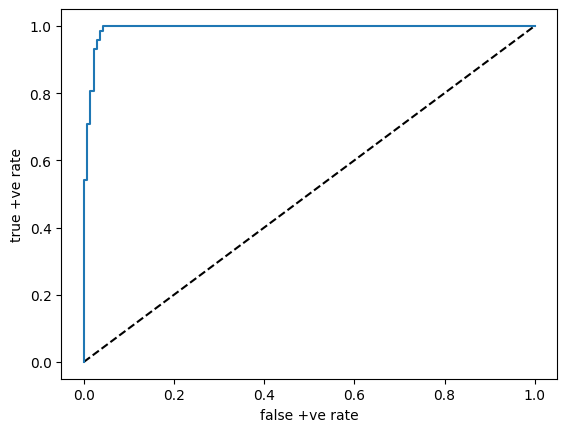

np.float64(0.9922504025764896)

In [58]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("false +ve rate")
plt.ylabel("true +ve rate")
plt.show()
roc_auc_score(y_test, y_pred_prob)

# everything same till train_test_split

In [59]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [60]:
clf.feature_importances_

array([0.03232117, 0.03225037, 0.75901809, 0.02066388, 0.02624805,
       0.09580797, 0.00878008, 0.02491039, 0.        ])

In [61]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[134   4]
 [  7  65]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       138
        True       0.94      0.90      0.92        72

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


In [62]:
y_pred_prob = clf.predict_proba(x_test)[:, 1]  # compute predicted probabilities
y_pred_prob

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0.])

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

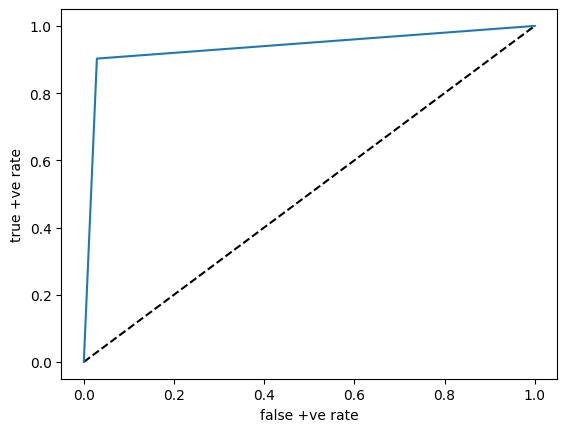

np.float64(0.9368961352657004)

In [64]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("false +ve rate")
plt.ylabel("true +ve rate")
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [65]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# BOSTON DATASET

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [67]:
path2 = r"C:\Users\ASUS\Downloads\Data & Code ML\Data & Code ML\Data and Programs DTree\Boston.csv"
path2

'C:\\Users\\ASUS\\Downloads\\Data & Code ML\\Data & Code ML\\Data and Programs DTree\\Boston.csv'

In [68]:
dff = pd.read_csv(path2)

In [69]:
dff

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [70]:
dff.shape

(506, 14)

In [71]:
x = dff.iloc[:,1:-1]
y = dff.iloc[: , -1]

In [72]:
x

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [73]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [74]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[134   4]
 [  7  65]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       138
        True       0.94      0.90      0.92        72

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


In [75]:
dff.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [76]:
path3 = r"C:\Users\ASUS\Downloads\Data & Code ML\Data & Code ML\Data and Programs K-Means\USArrests.csv"
path3

'C:\\Users\\ASUS\\Downloads\\Data & Code ML\\Data & Code ML\\Data and Programs K-Means\\USArrests.csv'

In [89]:
arrests = pd.read_csv(path3 , index_col=0)

In [90]:
arrests

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [91]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [92]:
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
arrestsscaled=scaler.fit_transform(arrests)

In [93]:
arrestsscaled = pd.DataFrame(arrestsscaled,
                          columns=arrests.columns,
                          index=arrests.index)


In [94]:
# Import KMeans
from sklearn.cluster import KMeans

In [95]:
# Create a KMeans instance with clusters: model
model = KMeans(n_clusters=3,random_state=2021)

In [96]:
# Fit model to points
model.fit(arrestsscaled)


KMeans(n_clusters=3, random_state=2021)

In [97]:
# Cluster Centroids
print(model.cluster_centers_)

[[ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.88515915 -1.0213324  -0.94990286 -0.92016524]
 [-0.49440658 -0.3864845   0.58167593 -0.26431024]]


In [98]:
#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(arrestsscaled)


In [99]:

# Print cluster labels of new_points
print(labels)

[0 0 0 1 0 0 2 2 0 0 2 1 0 2 1 2 1 0 1 0 2 0 1 0 0 1 1 0 1 2 0 0 0 1 2 2 2
 2 2 0 1 0 0 2 1 2 2 1 1 2]


In [100]:
clusterID = pd.DataFrame({'ClustID':labels})
clusteredData = pd.concat([arrests.reset_index(),clusterID],axis=1)

In [101]:
clusteredData

,index,Murder,Assault,UrbanPop,Rape,ClustID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [102]:

# Variation
print(model.inertia_)

80.08569526137275


In [103]:
clustNos = [2,3,4,5,6,7,8,9,10]
Inertia = []

In [104]:

for i in clustNos :
    model = KMeans(n_clusters=i,random_state=2021)
    model.fit(arrestsscaled)
    Inertia.append(model.inertia_)

In [105]:
# Import pyplot
import matplotlib.pyplot as plt

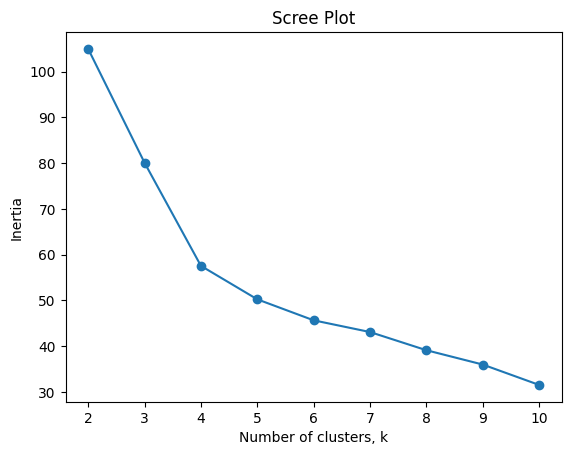

In [106]:
plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()

In [107]:
# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=4,random_state=2021)

In [108]:
# Fit model to points
model.fit(arrestsscaled)

KMeans(n_clusters=4, random_state=2021)

In [109]:

# Cluster Centroids
print(model.cluster_centers_)


[[ 0.70212683  1.04999438  0.72997363  1.28990383]
 [-0.97130281 -1.11783581 -0.93954982 -0.97657842]
 [-0.49440658 -0.3864845   0.58167593 -0.26431024]
 [ 1.42622412  0.88321132 -0.82279055  0.01946669]]


In [110]:
#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(arrestsscaled)

In [111]:
########################### Pipeline ##########################
from sklearn.pipeline import make_pipeline


In [112]:

# Create scaler: scaler
scaler = StandardScaler()

In [113]:

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

In [114]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

In [115]:
# Fit the pipeline to samples
arrestsscaled = pipeline.fit_transform(arrests)
pipeline.fit(arrestsscaled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [116]:
# Calculate the cluster labels: labels
labels = pipeline.predict(arrestsscaled)

In [117]:
# Display ct
print(labels)
clusterID = pd.DataFrame({'ClustID':labels},index=arrests.index)
clusteredData = pd.concat([arrests,clusterID],
                          axis='columns')

[0 3 3 2 3 3 1 2 3 0 1 1 3 2 1 2 2 0 1 0 2 3 1 0 2 2 2 3 1 2 3 3 0 1 2 2 2
 2 1 0 1 0 3 2 1 2 2 1 1 2]


In [118]:
clusteredData.groupby('ClustID').mean()
clusteredData.sort_values('ClustID')

,Murder,Assault,UrbanPop,Rape,ClustID
Alabama,13.2,236,58,21.2,0
Georgia,17.4,211,60,25.8,0
Maryland,11.3,300,67,27.8,0
Louisiana,15.4,249,66,22.2,0
Mississippi,16.1,259,44,17.1,0
Tennessee,13.2,188,59,26.9,0
South Carolina,14.4,279,48,22.5,0
North Carolina,13.0,337,45,16.1,0
Maine,2.1,83,51,7.8,1
Idaho,2.6,120,54,14.2,1
